**STRESS LEVEL PREDICTION IN SLEEP PATTERNS**

About the dataset:
The dataset explores the relationship between the snoring range of the user, respiration rate, body temperature, limb movement rate, blood oxygen levels, eye movement, number of hours of sleep, heart rate and Stress Levels (0- low/normal, 1 – medium low, 2- medium, 3-medium high, 4 -high).

**Column Descriptions:**

**'sr' or 'snoring_rate'**: The rate or intensity of snoring during sleep, which could be measured in some unit or scale.
'rr' or 'respiration_rate': The number of breaths taken per minute during sleep.

**'t' or 'body_temperature'**: The body temperature of the user during sleep, possibly measured in degrees Celsius or Fahrenheit.

**'lm' or 'limb_movement'**: The rate or intensity of limb movement during sleep, indicating how active or restless the person is.

**'bo' or 'blood_oxygen'**: The blood oxygen level, which represents the amount of oxygen present in the blood during sleep.

**'rem' or 'eye_movement'**: The eye movement activity during sleep, which might indicate the Rapid Eye Movement (REM) phase of sleep.

**'sr.1' or 'sleeping_hours'**: The number of hours slept during a particular sleep session.

**'hr' or 'heart_rate'**: The number of heartbeats per minute during sleep, an essential physiological parameter related to overall health and sleep quality.

**'sl' or 'stress_level**': The target variable representing the stress level during sleep, categorized into:

(0- low/normal, 1 – medium low, 2- medium, 3-medium high, 4 -high)

In [1]:
# import the necessary packages
# import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
# Import the confusion_matrix function for evaluating classification results
from sklearn.metrics import confusion_matrix
# Import the classification_report function for detailed classification metrics
from sklearn.metrics import classification_report
# For Logistic Regression model
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


In [2]:
sleep_df =pd.read_csv('/content/SaYoPillow.csv')
sleep_df.head()

sr      rr       t      lm      bo    rem   sr.1     hr  sl
0  93.80  25.680  91.840  16.600  89.840  99.60  1.840  74.20   3
1  91.64  25.104  91.552  15.880  89.552  98.88  1.552  72.76   3
2  60.00  20.000  96.000  10.000  95.000  85.00  7.000  60.00   1
3  85.76  23.536  90.768  13.920  88.768  96.92  0.768  68.84   3
4  48.12  17.248  97.872   6.496  96.248  72.48  8.248  53.12   0

In [3]:
# Renaming the columns of the DataFrame
sleep_df.columns=['snoring_rate', 'respiration_rate', 'body_temperature', 'limb_movement', 'blood_oxygen', \
             'eye_movement', 'sleeping_hours', 'heart_rate', 'stress_level']
sleep_df.head()

snoring_rate  respiration_rate  body_temperature  limb_movement  \
0         93.80            25.680            91.840         16.600   
1         91.64            25.104            91.552         15.880   
2         60.00            20.000            96.000         10.000   
3         85.76            23.536            90.768         13.920   
4         48.12            17.248            97.872          6.496   

   blood_oxygen  eye_movement  sleeping_hours  heart_rate  stress_level  
0        89.840         99.60           1.840       74.20             3  
1        89.552         98.88           1.552       72.76             3  
2        95.000         85.00           7.000       60.00             1  
3        88.768         96.92           0.768       68.84             3  
4        96.248         72.48           8.248       53.12             0

In [4]:
# Explore the data
sleep_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   snoring_rate      630 non-null    float64
 1   respiration_rate  630 non-null    float64
 2   body_temperature  630 non-null    float64
 3   limb_movement     630 non-null    float64
 4   blood_oxygen      630 non-null    float64
 5   eye_movement      630 non-null    float64
 6   sleeping_hours    630 non-null    float64
 7   heart_rate        630 non-null    float64
 8   stress_level      630 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 44.4 KB


In [5]:
sleep_df.describe()

snoring_rate  respiration_rate  body_temperature  limb_movement  \
count    630.000000        630.000000         630.00000     630.000000   
mean      71.600000         21.800000          92.80000      11.700000   
std       19.372833          3.966111           3.52969       4.299629   
min       45.000000         16.000000          85.00000       4.000000   
25%       52.500000         18.500000          90.50000       8.500000   
50%       70.000000         21.000000          93.00000      11.000000   
75%       91.250000         25.000000          95.50000      15.750000   
max      100.000000         30.000000          99.00000      19.000000   

       blood_oxygen  eye_movement  sleeping_hours  heart_rate  stress_level  
count    630.000000    630.000000      630.000000  630.000000    630.000000  
mean      90.900000     88.500000        3.700000   64.500000      2.000000  
std        3.902483     11.893747        3.054572    9.915277      1.415337  
min       82.000000     60.000000        0.000000   50.000000      0.000000  
25%       88.500000     81.250000        0.500000   56.250000      1.000000  
50%       91.000000     90.000000        3.500000   62.500000      2.000000  
75%       94.250000     98.750000        6.500000   72.500000      3.000000  
max       97.000000    105.000000        9.000000   85.000000      4.000000

In [6]:
!pip install ydata_profiling

In [7]:
# Create a pandas profiling reports to gain insights into the dataset
from ydata_profiling import ProfileReport
report = ProfileReport(sleep_df, title = 'Pandas Profiling Report')
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
# Remove duplicates, if they exist
New = sleep_df.duplicated()
New

0      False
1      False
2      False
3      False
4      False
       ...  
625    False
626    False
627    False
628    False
629    False
Length: 630, dtype: bool

In [9]:
# Handle Missing and corrupted values
sleep_df.isnull().sum()

snoring_rate        0
respiration_rate    0
body_temperature    0
limb_movement       0
blood_oxygen        0
eye_movement        0
sleeping_hours      0
heart_rate          0
stress_level        0
dtype: int64

In [10]:
sleep_df.corr()

snoring_rate  respiration_rate  body_temperature  \
snoring_rate          1.000000          0.976268         -0.902475   
respiration_rate      0.976268          1.000000         -0.889237   
body_temperature     -0.902475         -0.889237          1.000000   
limb_movement         0.981078          0.991738         -0.896412   
blood_oxygen         -0.903140         -0.889210          0.998108   
eye_movement          0.950600          0.935572         -0.857299   
sleeping_hours       -0.920554         -0.891855          0.954860   
heart_rate            0.976268          1.000000         -0.889237   
stress_level          0.975322          0.963516         -0.962354   

                  limb_movement  blood_oxygen  eye_movement  sleeping_hours  \
snoring_rate           0.981078     -0.903140      0.950600       -0.920554   
respiration_rate       0.991738     -0.889210      0.935572       -0.891855   
body_temperature      -0.896412      0.998108     -0.857299        0.954860   
limb_movement          1.000000     -0.898527      0.964703       -0.901102   
blood_oxygen          -0.898527      1.000000     -0.862136        0.950189   
eye_movement           0.964703     -0.862136      1.000000       -0.893952   
sleeping_hours        -0.901102      0.950189     -0.893952        1.000000   
heart_rate             0.991738     -0.889210      0.935572       -0.891855   
stress_level           0.971071     -0.961092      0.951988       -0.973036   

                  heart_rate  stress_level  
snoring_rate        0.976268      0.975322  
respiration_rate    1.000000      0.963516  
body_temperature   -0.889237     -0.962354  
limb_movement       0.991738      0.971071  
blood_oxygen       -0.889210     -0.961092  
eye_movement        0.935572      0.951988  
sleeping_hours     -0.891855     -0.973036  
heart_rate          1.000000      0.963516  
stress_level        0.963516      1.000000

<Axes: >

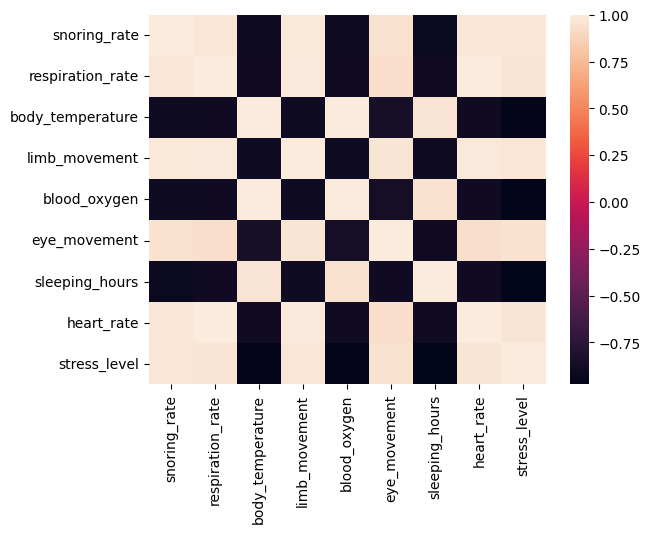

In [11]:
sns.heatmap(sleep_df.corr())

In [12]:
sleep_df.columns

Index(['snoring_rate', 'respiration_rate', 'body_temperature', 'limb_movement',
       'blood_oxygen', 'eye_movement', 'sleeping_hours', 'heart_rate',
       'stress_level'],
      dtype='object')

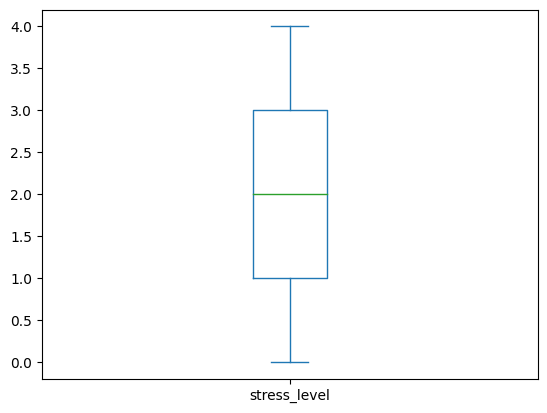

In [13]:
# Handle outliers, if they exist
# Using Scatterplot to identify Outliers

sleep_df['stress_level'].plot(kind = 'box')
plt.show()

In [14]:
# To display number of samples on each class
sleep_df['stress_level'].value_counts()

stress_level
3    126
1    126
0    126
2    126
4    126
Name: count, dtype: int64

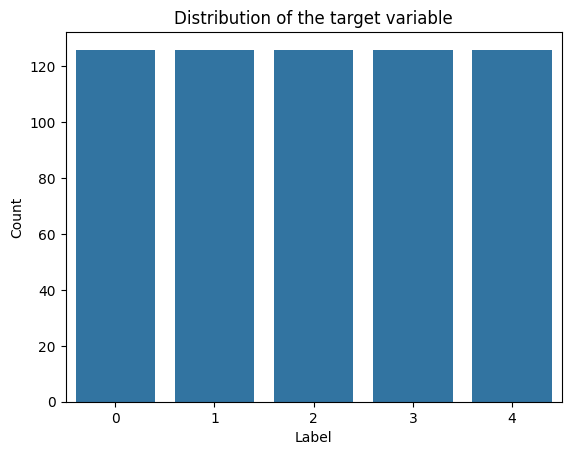

In [15]:
# Creating a count plot to visualize the distribution of the target variable 'stress_level'
# using the countplot() function from the seaborn library
# The 'stress_level' column from the DataFrame 'data' is specified as the x-axis variable
sns.countplot(x='stress_level', data=sleep_df)

# Setting the label for the x-axis
plt.xlabel('Label')

# Setting the label for the y-axis
plt.ylabel('Count')

# Setting the title of the plot
plt.title('Distribution of the target variable')

# Displaying the plot
plt.show()


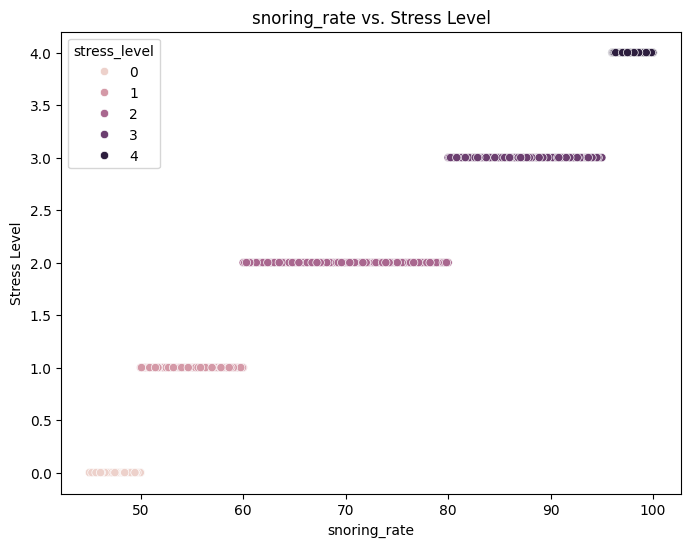

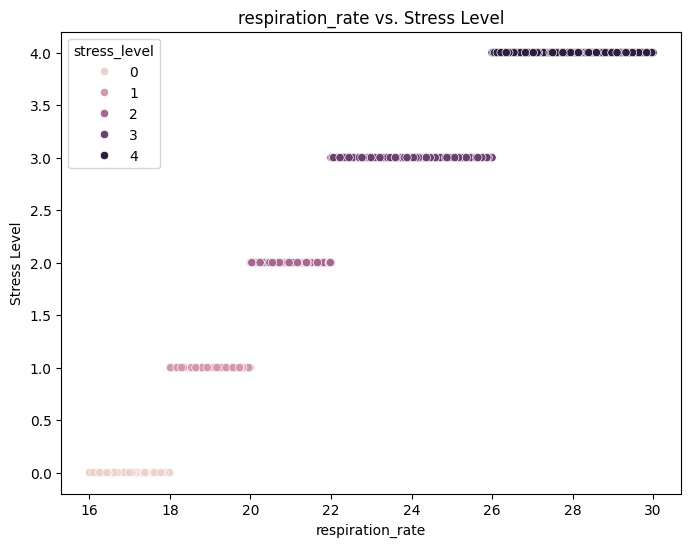

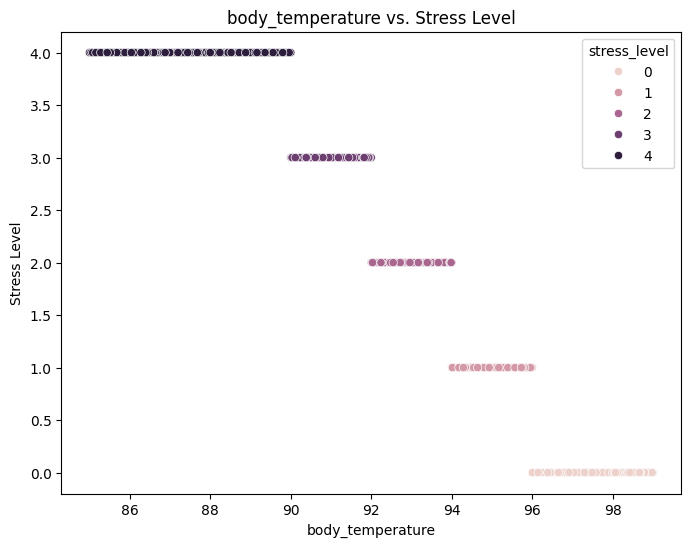

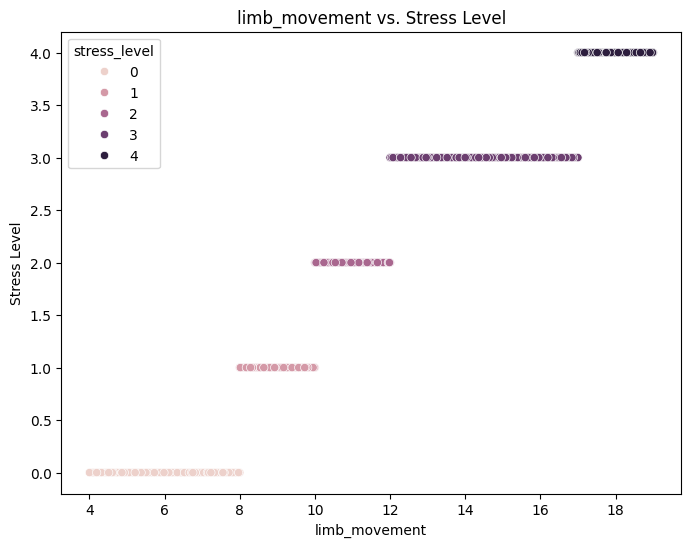

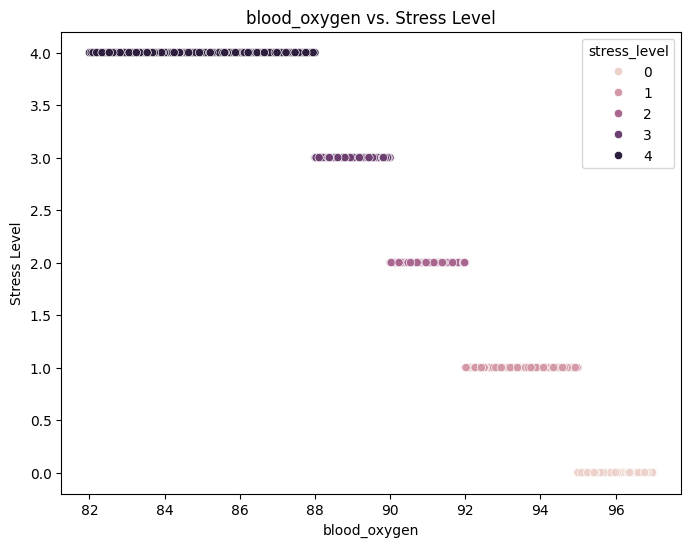

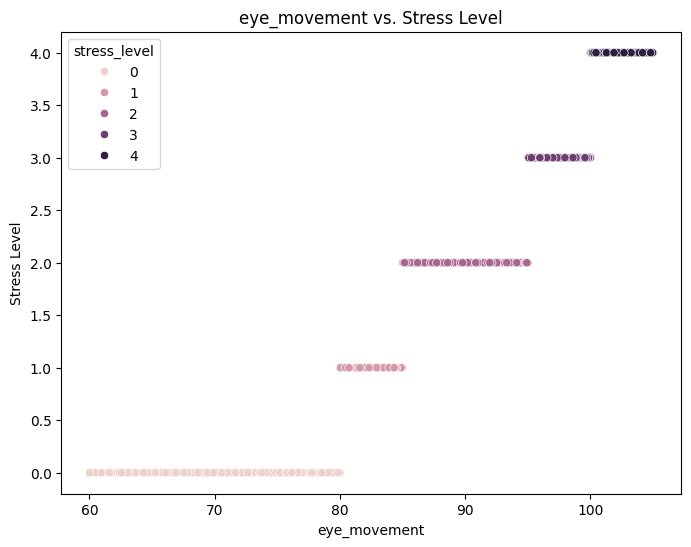

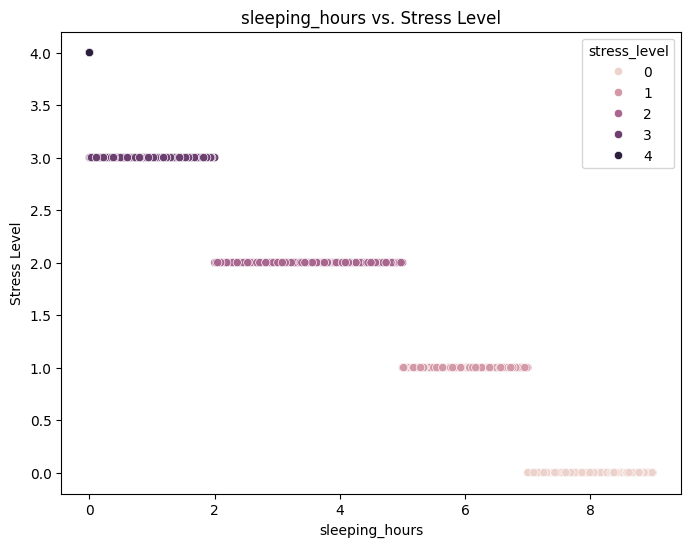

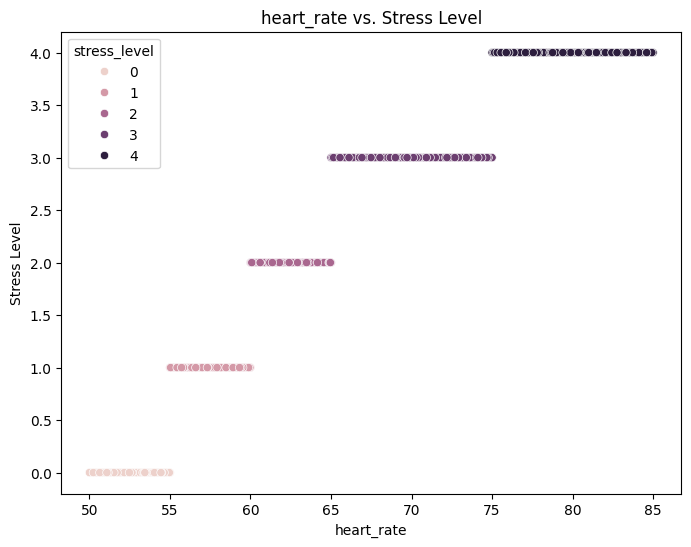

In [16]:
# Scatter plots for each numerical feature against 'stress_level'
for feature in sleep_df.columns[:-1]:  # Exclude the target variable 'stress_level'
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=sleep_df, x=feature, y='stress_level', hue='stress_level')
    plt.title(f"{feature} vs. Stress Level")
    plt.xlabel(feature)
    plt.ylabel("Stress Level")
    plt.show()

In [17]:
sleep_df.head()

snoring_rate  respiration_rate  body_temperature  limb_movement  \
0         93.80            25.680            91.840         16.600   
1         91.64            25.104            91.552         15.880   
2         60.00            20.000            96.000         10.000   
3         85.76            23.536            90.768         13.920   
4         48.12            17.248            97.872          6.496   

   blood_oxygen  eye_movement  sleeping_hours  heart_rate  stress_level  
0        89.840         99.60           1.840       74.20             3  
1        89.552         98.88           1.552       72.76             3  
2        95.000         85.00           7.000       60.00             1  
3        88.768         96.92           0.768       68.84             3  
4        96.248         72.48           8.248       53.12             0

In [18]:
sleep_df.shape

(630, 9)

In [19]:
numeric_features = ['snoring_rate', 'respiration_rate', 'body_temperature', 'limb_movement',
       'blood_oxygen', 'eye_movement', 'sleeping_hours', 'heart_rate',
       'stress_level']

In [20]:
sc = StandardScaler()
#  Select target variable and the features
X = sleep_df.drop(columns =['stress_level'], axis =1) # Keep X as a DataFrame
X = sc.fit_transform(X)
y = sleep_df['stress_level'].values

#  Split the dataset to training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
# Define the model pipeline
lr = LogisticRegression(max_iter=1000, C=0.1)
lr


LogisticRegression(C=0.1, max_iter=1000)

In [22]:
# Fit the model pipeline to the training data
lr.fit(X_train, y_train)  # Call fit on the pipeline

# Make predictions
y_pred = lr.predict(X_test)

In [23]:
# Evaluate the model
print("Logistic Regression Score: ", lr.score(X_test, y_test))

Logistic Regression Score:  1.0


In [24]:
lr_pred = lr.predict(X_test)
lr_cm = confusion_matrix(y_test, lr_pred)

print("Confusion Matrix: ", lr_cm)

Confusion Matrix:  [[23  0  0  0  0]
 [ 0 24  0  0  0]
 [ 0  0 28  0  0]
 [ 0  0  0 26  0]
 [ 0  0  0  0 25]]


In [25]:
import joblib

# Save the model to a file using joblib
joblib.dump(lr, 'model.joblib2')  # Use 'model'

print("Model saved successfully!")

Model saved successfully!
